In [1]:
import os
os.chdir('/Users/philippratz/Documents/Uni/PhD/UQAM/research/fair_images')

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

In [4]:
from typing import Any


class FeatureExtractor:
    def __init__(self,
                 model,
                 target_layers):
        self.model_ = model[0]
        self.classifier_mod = model[1]
        self.target_layers = target_layers
        self.gradients = []

    def save_gradient(self, grad):
    	self.gradients.append(grad)

	def __call__(self, x):
	    outputs = []
        self.gradients = []
	
        for name, module in self.model_._modules.items():
                        if name == 'fc':
                            x = module(x.reshape(1,-1))
                        else:
                            x = module(x)
            if name in self.target_layers:
                x.register_hook(self.save_gradient)
                outputs += [x]
        
        return outputs, x

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 23)

In [4]:
# Load all prepared data 
with open('data/results/viz/gradcam_overall.pkl', 'rb') as con_:
    overall_gradcams = pickle.load(con_)
with open('data/results/viz/gradcam_female_example.pkl', 'rb') as con_:
    female_gradcams = pickle.load(con_)
with open('data/results/viz/gradcam_male_example.pkl', 'rb') as con_:
    male_gradcams = pickle.load(con_)

In [14]:
male_gradcams.keys()

dict_keys(['image_tensor', 'first_application', 'second_application'])

In [10]:
overall_gradcams.keys()

dict_keys(['male_img', 'male_activation', 'female_img', 'female_activation'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Individual Activation Bias')

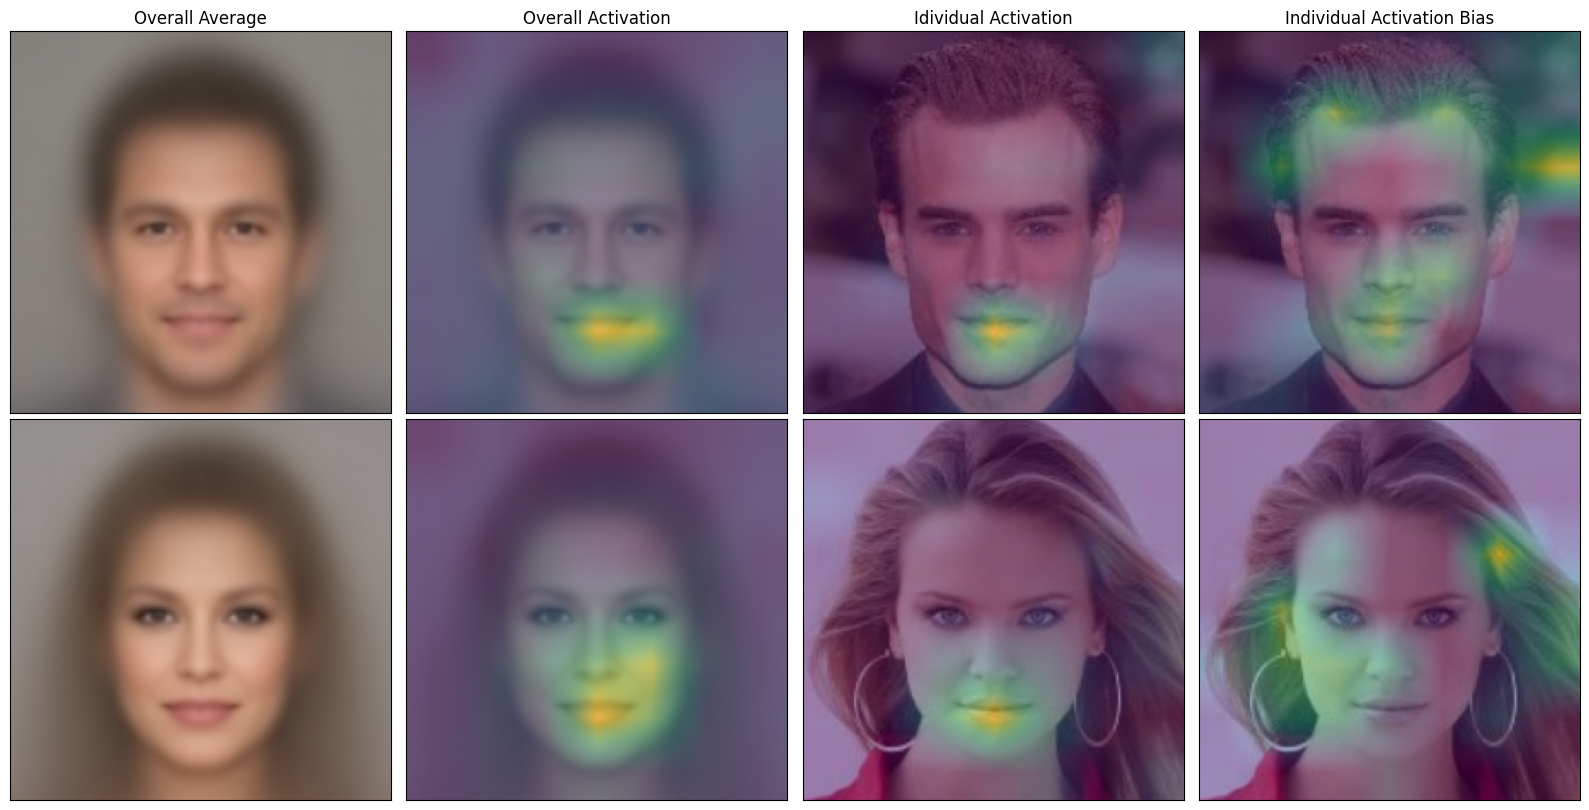

In [38]:
fig, ax = plt.subplots(2,4, figsize=(16,8))

for col_ in ax:
    for ax_ in col_:
        ax_.tick_params(left = False,
                            bottom = False, 
                            labelbottom=False, 
                            labelleft = False)
        
ax[0,0].imshow(overall_gradcams['male_img'])

ax[1,0].imshow(overall_gradcams['female_img'])


ax[0,1].imshow(overall_gradcams['male_img'])
ax[0,1].imshow(overall_gradcams['male_activation'], 
               alpha=0.5)

ax[1,1].imshow(overall_gradcams['female_img'])
ax[1,1].imshow(overall_gradcams['female_activation'], 
               alpha=0.5)


ax[0,2].imshow(male_gradcams['image_tensor'])
ax[0,2].imshow(male_gradcams['first_application'], 
               alpha=0.5)

ax[1,2].imshow(female_gradcams['image_tensor'])
ax[1,2].imshow(female_gradcams['first_application'], 
               alpha=0.5)

ax[0,3].imshow(male_gradcams['image_tensor'])
ax[0,3].imshow(male_gradcams['second_application'], 
               alpha=0.5)

ax[1,3].imshow(female_gradcams['image_tensor'])
ax[1,3].imshow(female_gradcams['second_application'], 
               alpha=0.5)

fig.tight_layout()
ax[0][0].set_title('Overall Average')
ax[0][1].set_title('Overall Activation')
ax[0][2].set_title('Idividual Activation')
ax[0][3].set_title('Individual Activation Bias')

In [ ]:
fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.05)

imshow(grid[0], inputs.squeeze())


In [ ]:
all_

In [ ]:
import numpy as np

def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    axis.imshow(inp)